In [1]:
import pandas as pd
lulc=pd.read_csv(r'lulc.csv')
osm=pd.read_csv('osmroad.csv')

In [2]:
lulc.head(1)

,FID,Lon,Lat,F_AREA,City_CODE,UUID,Level1,Level2,ORIG_FID
0,0,114.21061,30.47405,0.152839,420100,366815,1,101,0


In [3]:
lulc.shape

(2296, 9)

In [4]:
osm.columns

Index(['FID', 'OsmRoadJoi', 'OsmRoadJ_1', 'OsmRoadJ_2', 'OsmRoadJ_3',
       'OsmRoadJ_4', 'OsmRoadJ_5', 'OsmRoadJ_6', 'OsmRoadJ_7', 'OsmRoadJ_8',
       'OsmRoadJ_9', 'OsmRoad_10', 'OsmRoad_11', 'OsmRoad_12', 'OsmRoad_13',
       'OsmRoad_14', 'OsmRoad_15', 'OsmRoad_16', 'OsmRoad_17', 'OsmRoad_18',
       'OsmRoad_19', 'OsmRoad_20', 'OsmRoad_21', 'OsmRoad_22', 'OsmRoad_23',
       'OsmRoad_24', 'OsmRoad_25', 'OsmRoad_26', 'OsmRoad_27', 'OsmRoad_28',
       'OsmRoad_29', 'OsmRoad_30', 'OsmRoad_31', 'OsmRoad_32', 'OsmRoad_33',
       'OsmRoad_34', 'OsmRoad_35', 'OsmRoad_36', 'OsmRoad_37', 'pred_csv_F',
       'pred_csv_T', 'lat', 'lng'],
      dtype='object')

In [5]:
X=lulc[['Lon','Lat']].values

In [6]:
lulc_data={}
for index, row in lulc.iterrows():
    lulc_data[row['FID']]=row['Level2']

In [7]:
import numpy as np
from sklearn.neighbors import KDTree
# rng = np.random.RandomState(0)
# X = rng.random_sample((10, 3))  # 10 points in 3 dimensions
# X=np.array([[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]])
tree = KDTree(X, leaf_size=2)              

In [8]:
osm[['FID','lng','lat']].values.tolist()[0][0]

0.0

In [9]:
tree_data={}
for i in osm[['FID','lng','lat']].values.tolist():
    tmp=[]
    id=int(i[0])
    dist, ind = tree.query(np.array([[i[1],i[2]]]), k=10)  
    for j in ind[0]:
        tmp.append(int(lulc_data[j]))
    tree_data[id]=tmp

In [10]:
tree_data[0]

[301, 402, 201, 502, 505, 502, 101, 505, 101, 505]

In [11]:
pd.DataFrame(tree_data).T.to_csv('tree_data.csv')

In [12]:
labels=[101,201,202,301,402,501,502,503,504,505]
slabels=["['101']","['201']","['202']","['301']","['402']","['501']","['502']","['503']","['504']","['505']"]
types_label=['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']
types_labels=[0,1,2,3,4,5,6,7,8,9]
label_type={}
for i in enumerate(labels):
    label_type[i[1]]=i[0]
# label_type

#### 测试0524newweightpred

In [13]:
# pred=pd.read_csv('0524newweightpred.csv')
# pred.head(1)
# def get_label_list(FID,tree_data,label_type):
#     # tmp=tree_data[FID]
#     # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
#     replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
#     return replaced_list
# pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
# pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
# pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
# pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
# T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
# T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
# T5=pred[pred['@5']==True].shape[0]/pred.shape[0]

In [14]:
# T1,T3,T5

### 新数据

In [ ]:
pred=pd.read_csv(r'.\data\0622_200.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

In [ ]:
pred=pd.read_csv(r'C:\OneDriveFile\OneDrive - whu.edu.cn\旅游视角与街景视角的认知偏见\城市更新\gat0719.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.newdata in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.newdata in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.newdata in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.newdata in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['newdata'].values.tolist())
print(result)
T1,T3,T5,T10

### the SOTA method

In [23]:
pred=pd.read_csv(r'C:\OneDriveFile\OneDrive - whu.edu.cn\旅游视角与街景视角的认知偏见\城市更新\gat0719.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.OLD in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.OLD in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.OLD in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.OLD in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['OLD'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 3392, 6: 747, 3: 412, 2: 293, 8: 248, 1: 158, 9: 89, 5: 48, 7: 37, 4: 34})


(0.46225723708318067,
 0.7295712715280323,
 0.8241113961157933,
 0.8984976181751557)

In [21]:
pred=pd.read_csv(r'C:\OneDriveFile\OneDrive - whu.edu.cn\旅游视角与街景视角的认知偏见\城市更新\gat0719.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['newdata'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 1948, 3: 1177, 6: 1099, 2: 833, 8: 202, 9: 59, 1: 40, 4: 37, 7: 32, 5: 31})


(0.42103334554781974,
 0.6749725174056431,
 0.7711615976548186,
 0.8495786002198608)

In [10]:
pred=pd.read_csv(r'.\data\MLP.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 4222, 6: 1130, 3: 69, 2: 37})


(0.4496152436790033,
 0.7319530963722976,
 0.8384023451813851,
 0.9124221326493221)

##### 另外一个区域

In [11]:
pred=pd.read_csv(r'.\data\means_bert_3216.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 1836, 6: 1497, 8: 724, 3: 672, 2: 510, 9: 160, 7: 46, 1: 13})


(0.34371564675705385,
 0.5677903994137047,
 0.654452180285819,
 0.7579699523635031)

In [13]:
pred=pd.read_csv(r'.\data\means_bert_6432.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 2579, 3: 922, 6: 820, 8: 510, 2: 287, 9: 180, 1: 90, 7: 56, 4: 12, 5: 2})


(0.3948332722609014,
 0.6375961890802492,
 0.7299377061194576,
 0.8065225357273726)

In [14]:
pred=pd.read_csv(r'.\data\means_doc_3216.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 2076, 6: 1390, 3: 663, 8: 479, 2: 431, 9: 181, 1: 134, 4: 98, 5: 6})


(0.32740930743862223,
 0.5439721509710517,
 0.631916452913155,
 0.7381824844265299)

In [15]:
pred=pd.read_csv(r'.\data\means_doc_6432.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 2079, 6: 1139, 3: 710, 2: 543, 8: 508, 1: 213, 9: 160, 4: 64, 5: 26, 7: 16})


(0.3270428728471968,
 0.5481861487724441,
 0.6396115793330891,
 0.7504580432392818)

In [101]:
pred=pd.read_csv('.\data\MLP.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5

Counter({0: 3909, 6: 1440, 3: 109})


(0.4305606449248809, 0.7083180652253572, 0.8122022718944668)

In [20]:
pred=pd.read_csv('.\data\queen_bert_3216.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 3010, 6: 1044, 3: 951, 8: 281, 2: 137, 1: 29, 4: 6})


(0.38200806156101136, 0.6366801026016856, 0.73616709417369, 0.8237449615243679)

In [17]:
pred=pd.read_csv('.\data\queen_bert_6432.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 1903, 6: 1586, 3: 860, 2: 746, 8: 193, 1: 65, 7: 44, 4: 37, 9: 20, 5: 4})


(0.32099670208867714,
 0.5542323195309637,
 0.6478563576401613,
 0.7522902161964089)

In [18]:
pred=pd.read_csv('.\data\queen_doc_6432.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 2062, 6: 1043, 3: 1000, 8: 604, 2: 379, 1: 172, 9: 90, 7: 66, 4: 29, 5: 13})


(0.28948332722609016,
 0.49596921949432027,
 0.5928911689263466,
 0.6975082447783071)

In [19]:
pred=pd.read_csv('.\data\queen_doc_3216.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 2640, 6: 1172, 3: 860, 8: 530, 2: 183, 9: 35, 1: 30, 4: 8})


(0.33528765115426895,
 0.5641260534994503,
 0.6572004397215098,
 0.7497251740564309)

In [19]:
pred=pd.read_csv('.\data\means_gat_648.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 2874, 6: 882, 3: 636, 2: 483, 8: 253, 1: 116, 9: 93, 5: 62, 7: 35, 4: 24})


(0.43495786002198605,
 0.6971418101868816,
 0.7929644558446317,
 0.8704653719311103)

In [14]:
pred=pd.read_csv('.\data\queen_gat_648.100.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 3286, 6: 989, 3: 513, 8: 335, 2: 145, 1: 74, 9: 48, 7: 28, 4: 21, 5: 19})


(0.453646024184683, 0.7215097105166728, 0.8131183583730304, 0.8838402345181385)

In [12]:
pred=pd.read_csv('G:\谷歌浏览器下载\queen_gat_648.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 2799, 2: 873, 6: 783, 3: 607, 1: 113, 9: 112, 8: 81, 7: 61, 4: 19, 5: 10})


(0.375778673506779, 0.6233052400146574, 0.7227922315866617, 0.817882008061561)

In [15]:
pred=pd.read_csv('.\data\means_sage_6432.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 2205, 6: 1038, 8: 693, 3: 673, 2: 624, 9: 79, 1: 54, 7: 50, 4: 41, 5: 1})


(0.36405276658116525,
 0.5921582997434958,
 0.6844998167827043,
 0.7739098570905093)

In [16]:
pred=pd.read_csv('.\data\queen_sage_6432.csv')
pred.head(1)
def get_label_list(FID,tree_data,label_type):
    # tmp=tree_data[FID]
    # tmp = [ x.replace('\'', "\\'") for x in tree_data[FID]]
    replaced_list = [x if x not in label_type else label_type[x] for x in tree_data[FID]]
    return replaced_list
pred['tabel']=pred.apply(lambda x: get_label_list(x['FID'],tree_data,label_type),axis=1)
pred['@1']=pred.apply(lambda x: True if (x.Type in x.tabel[0:1]) else False, axis=1)
pred['@3']=pred.apply(lambda x: True if (x.Type in x.tabel[0:3]) else False, axis=1)
pred['@5']=pred.apply(lambda x: True if (x.Type in x.tabel[0:5]) else False, axis=1)
pred['@10']=pred.apply(lambda x: True if (x.Type in x.tabel[0:10]) else False, axis=1)
T1=pred[pred['@1']==True].shape[0]/pred.shape[0]
T3=pred[pred['@3']==True].shape[0]/pred.shape[0]
T5=pred[pred['@5']==True].shape[0]/pred.shape[0]
T10=pred[pred['@10']==True].shape[0]/pred.shape[0]
from collections import Counter
result = Counter(pred['Type'].values.tolist())
print(result)
T1,T3,T5,T10

Counter({0: 1817, 6: 1624, 3: 666, 2: 562, 8: 383, 1: 138, 9: 127, 7: 100, 4: 27, 5: 14})


(0.29149871747893, 0.5091608647856357, 0.5971051667277391, 0.7063026749725174)

#### 其他事情

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# predictions1 = np.asscalar(np.argmax(predictions, axis=1))

# print(classification_report(y_test, predictions))
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [ ]:
#预测结果并输出
# predict_y
# test_y
# print('精准率--->', precision_score(test_y, predict_y,average="weighted"))
# print('F1值--->', f1_score(test_y, predict_y,average="weighted"))
# print('召回率--->', recall_score(test_y, predict_y,average="weighted"))

In [ ]:
osm

In [20]:
pred.head(1)

,FID,Type,tabel,@1,@3,@5,@10
0,0,1,"[3, 4, 1, 6, 9, 6, 0, 9, 0, 9]",False,True,True,True


In [21]:
sv_osm=pd.read_csv('C:\OneDriveFile\OneDrive - whu.edu.cn\城市知识图谱词干提取\构建新的空间邻近\KD处理测试集\空间链接表29k_街景_路段0514.csv')

In [22]:
osm_sv_scene={}
osm_sv_id={}
osm_sv_imgpath={}

osm_sv_label={}
osm_sv_wuhan={}
osm_fid=pred['FID'].values.tolist()
for i in osm_fid:
  osm_sv_id[i]=sv_osm[sv_osm['JOIN_FID']==i]['ORIG_FID'].values.tolist()
  osm_sv_scene[i]=sv_osm[sv_osm['JOIN_FID']==i]['scene'].values.tolist()
  osm_sv_imgpath[i]=sv_osm[sv_osm['JOIN_FID']==i]['nid'].values.tolist()
  #来计算标签
  osm_sv_label[i]=sv_osm[sv_osm['JOIN_FID']==i]['multi_labe'].values.tolist()
  # osm_sv_wuhan[i]=sv_osm[sv_osm['JOIN_FID']==i]['type'].values.tolist()

In [23]:
osm_sv_scene[0]

['a person walking down a sidewalk next to trees ; a blue car parked on the side of the road ; a fence that is next to a fence ; a body of water with a tree next to it',
 'an empty road surrounded by trees and bushes ; a view of a street from the sidewalk ; a large body of water surrounded by trees ; a garden with a tree in the corner',
 'two people riding motorcycles on a city street ; a person is walking down the street near trees ; a car parked on the side of the road ; a large building on the side of the road']

In [40]:
scene={}
for i in range(10):
    val=""
    tmp=pred[pred['Type']==i]
    for j in tmp['FID'].values.tolist():
        ss=osm_sv_scene[j]
        val=val+';'.join(ss)
    scene[i]=val

In [44]:
for i in range(10):
    f=open(str(i)+'.txt','w+')
    f.write(scene[i])

In [39]:
values=['car','tree','window','person','people','truck','building','bus','road','tree','ruck','bridge']
len(values)

2

In [47]:
# import spacy

In [37]:
from collections import Counter

# Dictionary

my_dict = {'T': 23, 'U': 22, 'T': 21,'O': 20, 'R': 32, 'S': 99}

k = Counter(my_dict)

# 3 highest values

high = k.most_common(3)

print("具有3个最高值的字典：")

print("Keys : Values")

for i in high:
    print(i[0]," : ",i[1]," ")

具有3个最高值的字典：
Keys : Values
S  :  99  
R  :  32  
U  :  22  


In [33]:
sorted(dict.values(),key=(lambda x:x),reverse=True)

[8, 7, 3, 1]

#### 开始试验

In [3]:
import pandas as pd
# print(pd.read_csv('C:\OneDriveFile\OneDrive - whu.edu.cn\城市知识图谱词干提取\构建新的空间邻近\KD处理测试集\osmembd0516.csv').values.shape)
# embeddings=pd.read_csv('C:\OneDriveFile\OneDrive - whu.edu.cn\城市知识图谱词干提取\构建新的空间邻近\KD处理测试集\osmembd0516.csv').values[:,1:].T
# embeddings.shape

(768, 5459)


(5458, 768)

In [13]:
# embeddings=pd.read_csv('C:\OneDriveFile\OneDrive - whu.edu.cn\城市知识图谱词干提取\构建新的空间邻近\KD处理测试集\osmembd0516.csv').T
# embeddings.to_csv('embeddings.csv')#,index=None
# embeddings.head(1)
embeddings=pd.read_csv('embeddings.csv')
embeddings.head(1)

,FID,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0,272.0,273.0,274.0,275.0,276.0,277.0,278.0,279.0,280.0,281.0,282.0,283.0,284.0,285.0,286.0,287.0,288.0,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,335.0,336.0,337.0,338.0,339.0,340.0,341.0,342.0,343.0,344.0,345.0,346.0,347.0,348.0,349.0,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0,375.0,376.0,377.0,378.0,379.0,380.0,381.0,382.0,383.0,384.0,385.0,386.0,387.0,388.0,389.0,390.0,391.0,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,408.0,409.0,410.0,411.0,412.0,413.0,414.0,415.0,416.0,417.0,418.0,419.0,420.0,421.0,422.0,423.0,424.0,425.0,426.0,427.0,428.0,429.0,430.0,431.0,432.0,433.0,434.0,435.0,436.0,437.0,438.0,439.0,440.0,441.0,442.0,443.0,444.0,445.0,446.0,447.0,448.0,449.0,450.0,451.0,452.0,453.0,454.0,455.0,456.0,457.0,458.0,459.0,460.0,461.0,462.0,463.0,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0,481.0,482.0,483.0,484.0,485.0,486.0,487.0,488.0,489.0,490.0,491.0,492.0,493.0,494.0,495.0,496.0,497.0,498.0,499.0,500.0,501.0,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0,512.0,513.0,514.0,515.0,516.0,517.0,518.0,519.0,520.0,521.0,522.0,523.0,524.0,525.0,526.0,527.0,528.0,529.0,530.0,531.0,532.0,533.0,534.0,535.0,536.0,537.0,538.0,539.0,540.0,541.0,542.0,543.0,544.0,545.0,546.0,547.0,548.0,549.0,550.0,551.0,552.0,553.0,554.0,555.0,556.0,557.0,558.0,559.0,560.0,561.0,562.0,563.0,564.0,565.0,566.0,567.0,568.0,569.0,570.0,571.0,572.0,573.0,574.0,575.0,576.0,577.0,578.0,579.0,580.0,581.0,582.0,583.0,584.0,585.0,586.0,587.0,588.0,589.0,590.0,591.0,592.0,593.0,594.0,595.0,596.0,597.0,598.0,599.0,600.0,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0,611.0,612.0,613.0,614.0,615.0,616.0,617.0,618.0,619.0,620.0,621.0,622.0,623.0,624.0,625.0,626.0,627.0,628.0,629.0,630.0,631.0,632.0,633.0,634.0,635.0,636.0,637.0,638.0,639.0,640.0,641.0,642.0,643.0,644.0,645.0,646.0,647.0,648.0,649.0,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,660.0,661.0,662.0,663.0,664.0,665.0,666.0,667.0,668.0,669.0,670.0,671.0,672.0,673.0,674.0,675.0,676.0,677.0,678.0,679.0,680.0,681.0,682.0,683.0,6

In [14]:
gal=pd.read_csv('C:\OneDriveFile\OneDrive - whu.edu.cn\城市知识图谱词干提取\构建新的空间邻近\KD处理测试集\data\means_gat_648.csv')
gal.head(1)

,FID,Type
0,0,1


In [15]:
gal.shape

(5458, 2)

In [16]:
embeddings.shape

(5458, 769)

In [17]:
res=gal.merge(embeddings, left_on='FID', right_on='FID')
res.head(1)

,FID,Type,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0,272.0,273.0,274.0,275.0,276.0,277.0,278.0,279.0,280.0,281.0,282.0,283.0,284.0,285.0,286.0,287.0,288.0,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,335.0,336.0,337.0,338.0,339.0,340.0,341.0,342.0,343.0,344.0,345.0,346.0,347.0,348.0,349.0,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0,375.0,376.0,377.0,378.0,379.0,380.0,381.0,382.0,383.0,384.0,385.0,386.0,387.0,388.0,389.0,390.0,391.0,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,408.0,409.0,410.0,411.0,412.0,413.0,414.0,415.0,416.0,417.0,418.0,419.0,420.0,421.0,422.0,423.0,424.0,425.0,426.0,427.0,428.0,429.0,430.0,431.0,432.0,433.0,434.0,435.0,436.0,437.0,438.0,439.0,440.0,441.0,442.0,443.0,444.0,445.0,446.0,447.0,448.0,449.0,450.0,451.0,452.0,453.0,454.0,455.0,456.0,457.0,458.0,459.0,460.0,461.0,462.0,463.0,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0,481.0,482.0,483.0,484.0,485.0,486.0,487.0,488.0,489.0,490.0,491.0,492.0,493.0,494.0,495.0,496.0,497.0,498.0,499.0,500.0,501.0,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0,512.0,513.0,514.0,515.0,516.0,517.0,518.0,519.0,520.0,521.0,522.0,523.0,524.0,525.0,526.0,527.0,528.0,529.0,530.0,531.0,532.0,533.0,534.0,535.0,536.0,537.0,538.0,539.0,540.0,541.0,542.0,543.0,544.0,545.0,546.0,547.0,548.0,549.0,550.0,551.0,552.0,553.0,554.0,555.0,556.0,557.0,558.0,559.0,560.0,561.0,562.0,563.0,564.0,565.0,566.0,567.0,568.0,569.0,570.0,571.0,572.0,573.0,574.0,575.0,576.0,577.0,578.0,579.0,580.0,581.0,582.0,583.0,584.0,585.0,586.0,587.0,588.0,589.0,590.0,591.0,592.0,593.0,594.0,595.0,596.0,597.0,598.0,599.0,600.0,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0,611.0,612.0,613.0,614.0,615.0,616.0,617.0,618.0,619.0,620.0,621.0,622.0,623.0,624.0,625.0,626.0,627.0,628.0,629.0,630.0,631.0,632.0,633.0,634.0,635.0,636.0,637.0,638.0,639.0,640.0,641.0,642.0,643.0,644.0,645.0,646.0,647.0,648.0,649.0,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,660.0,661.0,662.0,663.0,664.0,665.0,666.0,667.0,668.0,669.0,670.0,671.0,672.0,673.0,674.0,675.0,676.0,677.0,678.0,679.0,680.0,681.0,682.0,68

In [18]:
res.groupby('Type').mean().drop(['FID'], axis=1).to_csv('embd.csv',index=None)
# df.drop(['B', 'C'], axis=1)

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [59]:
data=res.groupby('Type').mean()#.drop(['FID'], axis=1)

In [49]:
my_rho = np.corrcoef(np.array([data[data.index==0].drop(['FID'], axis=1).values[0],
data[data.index==1].drop(['FID'], axis=1).values[0],
data[data.index==2].drop(['FID'], axis=1).values[0],
data[data.index==3].drop(['FID'], axis=1).values[0],
data[data.index==4].drop(['FID'], axis=1).values[0],
data[data.index==5].drop(['FID'], axis=1).values[0],
data[data.index==6].drop(['FID'], axis=1).values[0],
data[data.index==7].drop(['FID'], axis=1).values[0],
data[data.index==8].drop(['FID'], axis=1).values[0],
data[data.index==9].drop(['FID'], axis=1).values[0]]))

<Figure size 720x576 with 0 Axes>

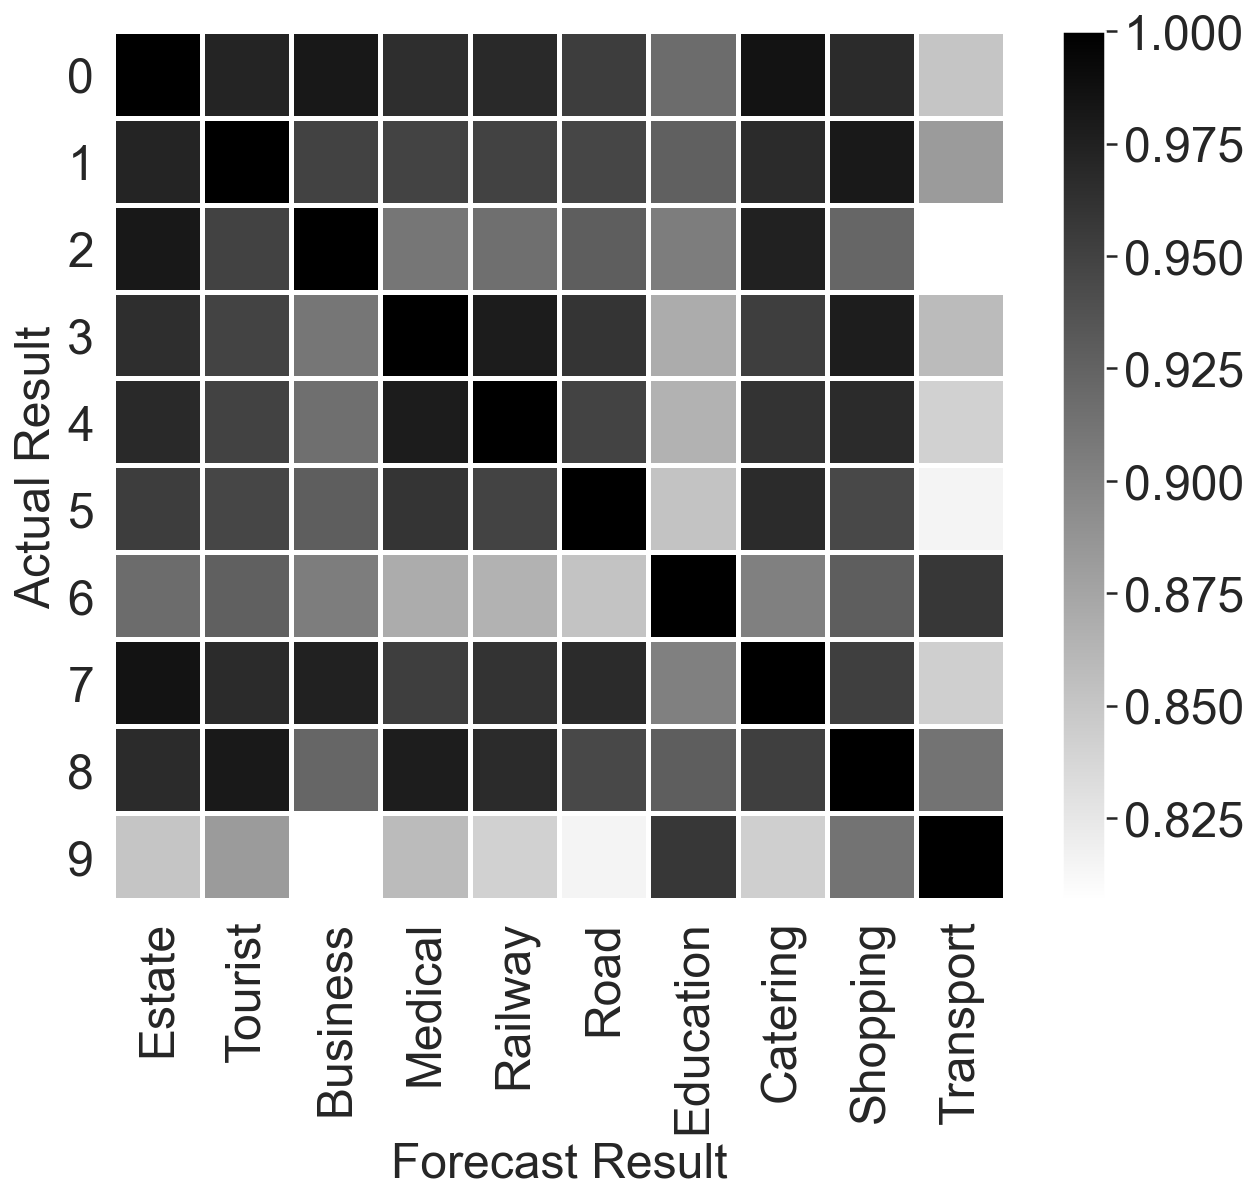

In [51]:
# print(my_rho)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#绘制混淆矩阵
conmatrix=my_rho
df_cm=pd.DataFrame(conmatrix,
columns=['Estate','Tourist','Business','Medical','Railway','Road','Education','Catering','Shopping','Transport'])#&Transport
 
plt.figure(figsize=(10,8))
f, ax= plt.subplots(figsize = (10, 8))
 
h=sns.heatmap(df_cm,annot=False,cmap="binary",fmt='.20g',ax=ax,linewidths=2,
            annot_kws={'size':21},cbar=False)
 
#h=sns.heatmap(data, annot=True,fmt='d',linewidths=0.5,cbar=False) #设置不使用其默认自带的colorbar
cb=h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=24) #设置colorbar刻度字体大小。
 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
 
ax.tick_params(labelsize=24)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
 
plt.ylabel('Actual Result',fontsize=24)
plt.xlabel('Forecast Result',fontsize=24)
plt.savefig('cnn.svg',format='svg')
plt.show()

In [69]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
corr = res.groupby('Type').mean().drop(['FID'], axis=1).T[[0,1,2,3,4,5,6,7,8,9]].corr()
corr

Type,0,1,2,3,4,5,6,7,8,9
Type,,,,,,,,,,
0,1.000000,0.972245,0.981283,0.964628,0.968273,0.953354,0.917792,0.985283,0.966847,0.850789
1,0.972245,1.000000,0.949683,0.948874,0.949502,0.946709,0.927348,0.967476,0.980787,0.882844
2,0.981283,0.949683,1.000000,0.910539,0.915720,0.928791,0.905267,0.974459,0.922400,0.806596
3,0.964628,0.948874,0.910539,1.000000,0.978481,0.960070,0.869722,0.953037,0.977705,0.858590
4,0.968273,0.949502,0.915720,0.978481,1.000000,0.948940,0.865303,0.961459,0.966818,0.841604
5,0.953354,0.946709,0.928791,0.960070,0.948940,1.000000,0.852302,0.966949,0.945501,0.815311
6,0.917792,0.927348,0.905267,0.869722,0.865303,0.852302,1.000000,0.903207,0.928547,0.958378
7,0.985283,0.967476,0.974459,0.953037,0.961459,0.966949,0.903207,1.000000,0.952358,0.843308
8,0.966847,0.980787,0.922400,0.977705,0.966818,0.945501,0.928547,0.952358,1.000000,0.912642


In [83]:
# corr.to_csv('area.csv',index=None)
corr.columns=['Residential','Business','Commercial',
'Industrial','Transportation','Administrative',
'Education','Medical','Culture','Parks']
corr.index=['Residential','Business','Commercial',
'Industrial','Transportation','Administrative',
'Education','Medical','Culture','Parks']

In [84]:
corr

,Residential,Business,Commercial,Industrial,Transportation,Administrative,Education,Medical,Culture,Parks
Residential,1.000000,0.972245,0.981283,0.964628,0.968273,0.953354,0.917792,0.985283,0.966847,0.850789
Business,0.972245,1.000000,0.949683,0.948874,0.949502,0.946709,0.927348,0.967476,0.980787,0.882844
Commercial,0.981283,0.949683,1.000000,0.910539,0.915720,0.928791,0.905267,0.974459,0.922400,0.806596
Industrial,0.964628,0.948874,0.910539,1.000000,0.978481,0.960070,0.869722,0.953037,0.977705,0.858590
Transportation,0.968273,0.949502,0.915720,0.978481,1.000000,0.948940,0.865303,0.961459,0.966818,0.841604
Administrative,0.953354,0.946709,0.928791,0.960070,0.948940,1.000000,0.852302,0.966949,0.945501,0.815311
Education,0.917792,0.927348,0.905267,0.869722,0.865303,0.852302,1.000000,0.903207,0.928547,0.958378
Medical,0.985283,0.967476,0.974459,0.953037,0.961459,0.966949,0.903207,1.000000,0.952358,0.843308
Culture,0.966847,0.980787,0.922400,0.977705,0.966818,0.945501,0.928547,0.952358,1.000000,0.912642
Parks,0.850789,0.882844,0.806596,0.858590,0.841604,0.815311,0.958378,0.843308,0.912642,1.000000


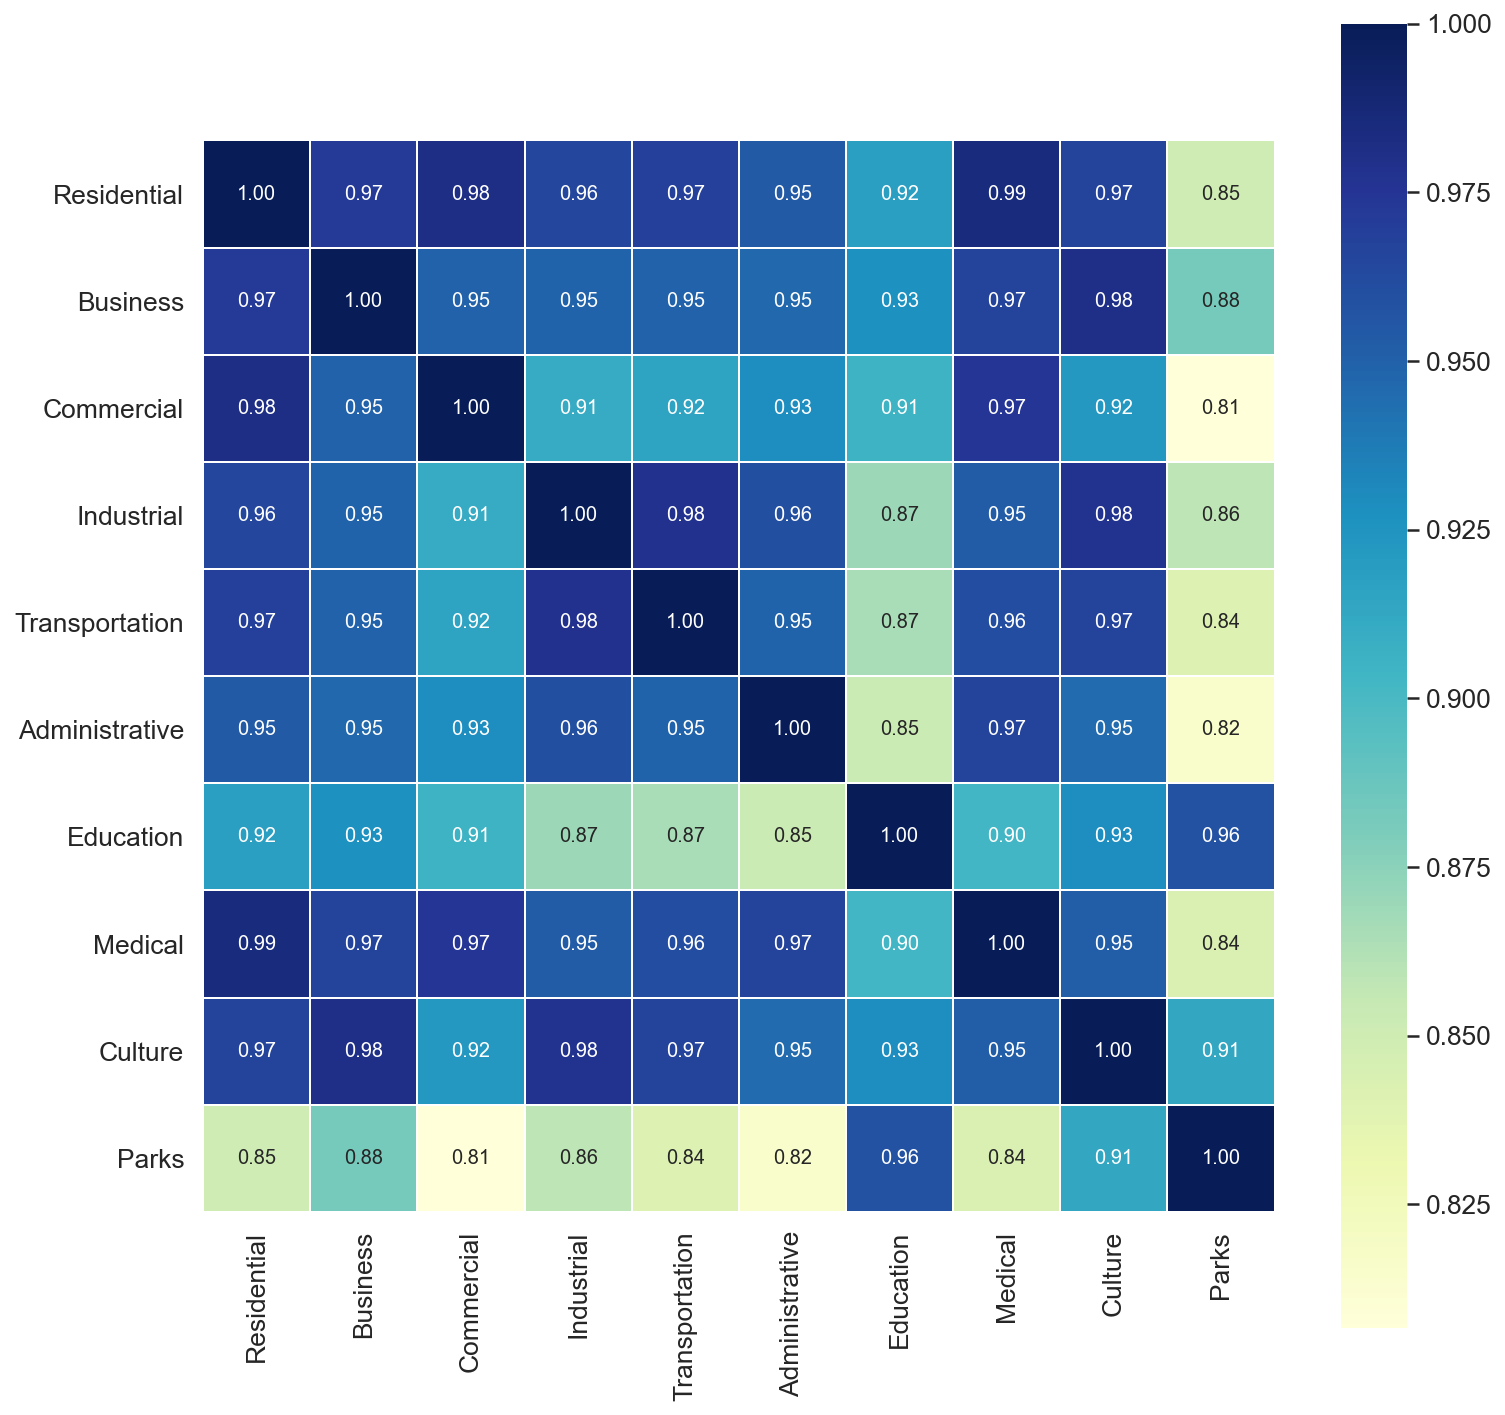

In [91]:
# 样式1
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data=corr,#data.corr(), 
            annot=True,
            annot_kws={"size":10},
            square=True,
            cmap="YlGnBu",
            fmt='.2f', 
            linewidths=0.5,
            linecolor='w',
            ax=ax)
plt.savefig('2.svg')

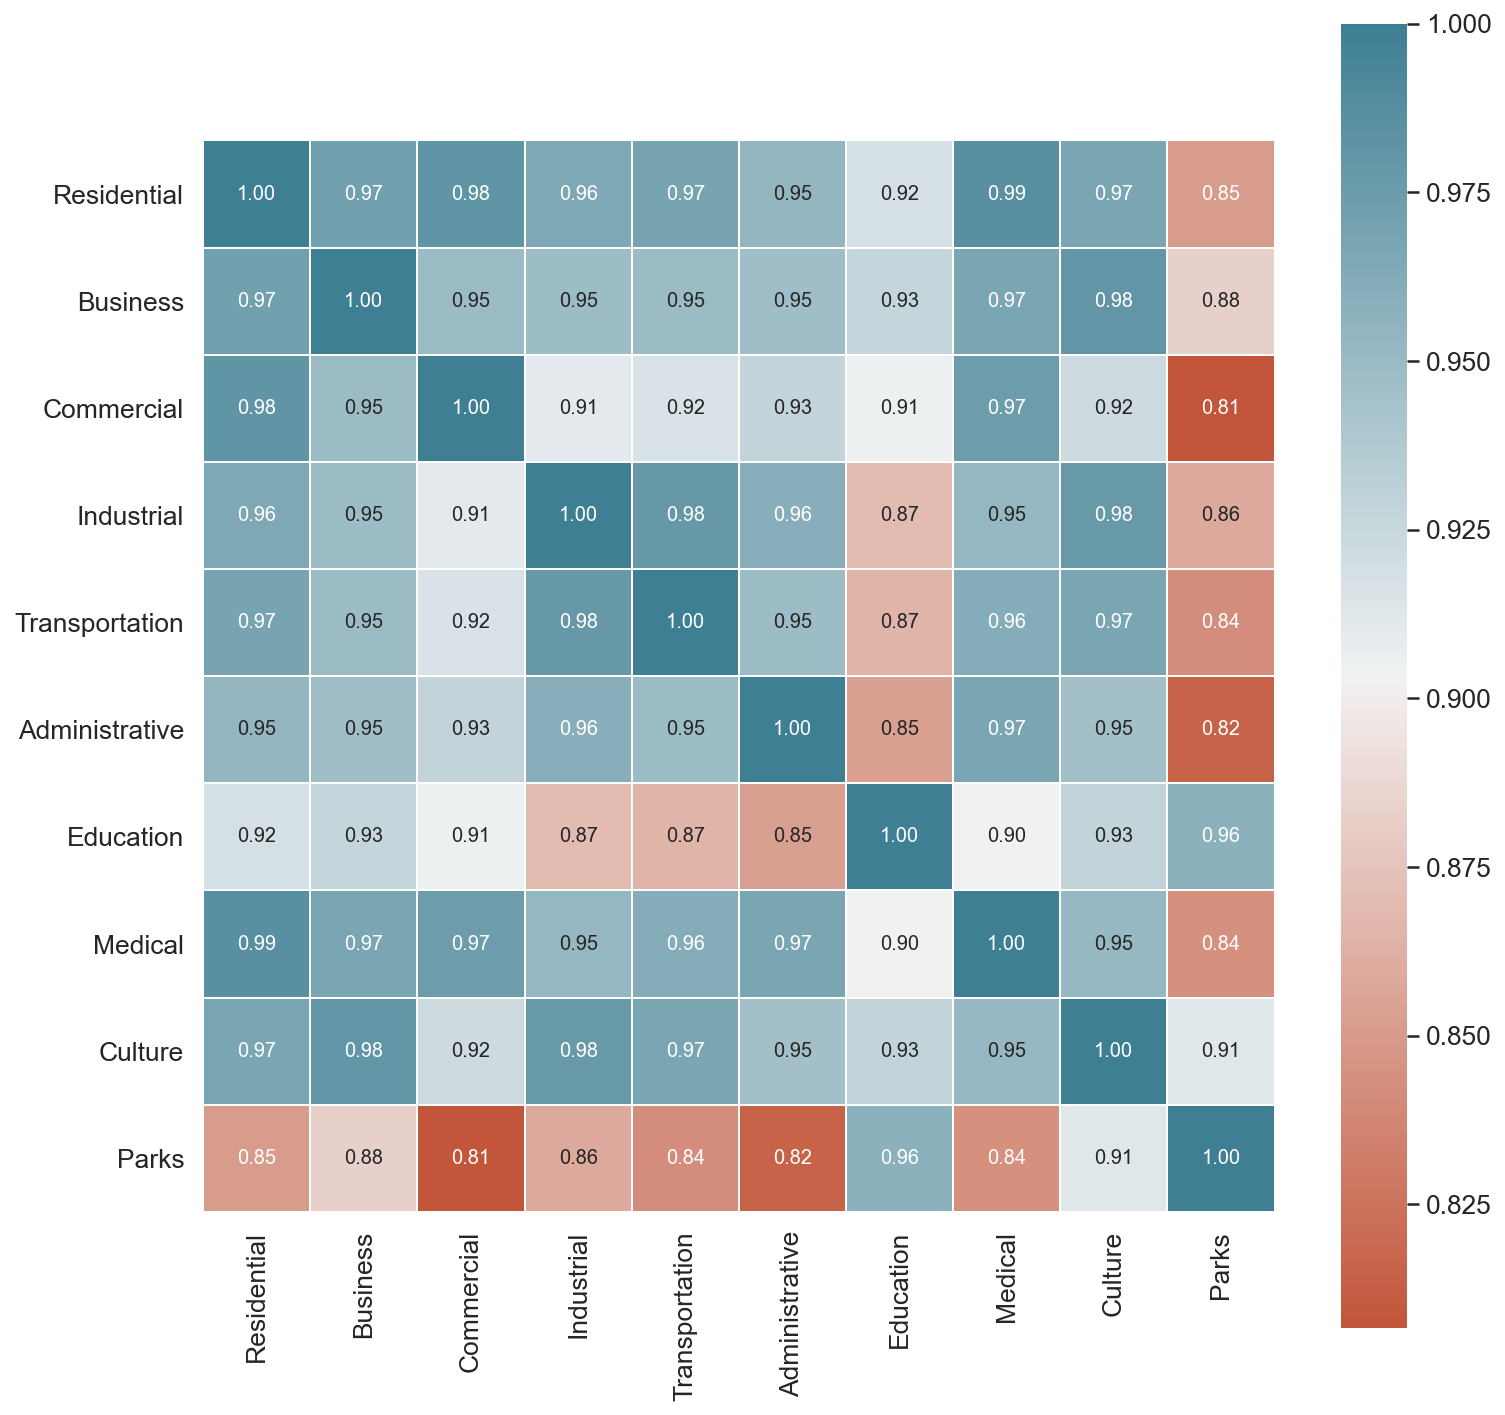

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data=corr,#data.corr(), 
            annot=True,
            annot_kws={"size":10},
            square=True,
            cmap=sns.diverging_palette(20, 220, n=256),
            fmt='.2f', 
            linewidths=0.5,
            linecolor='w',
            ax=ax)
plt.savefig('3.svg')

In [88]:
corr.to_csv('corr.csv')

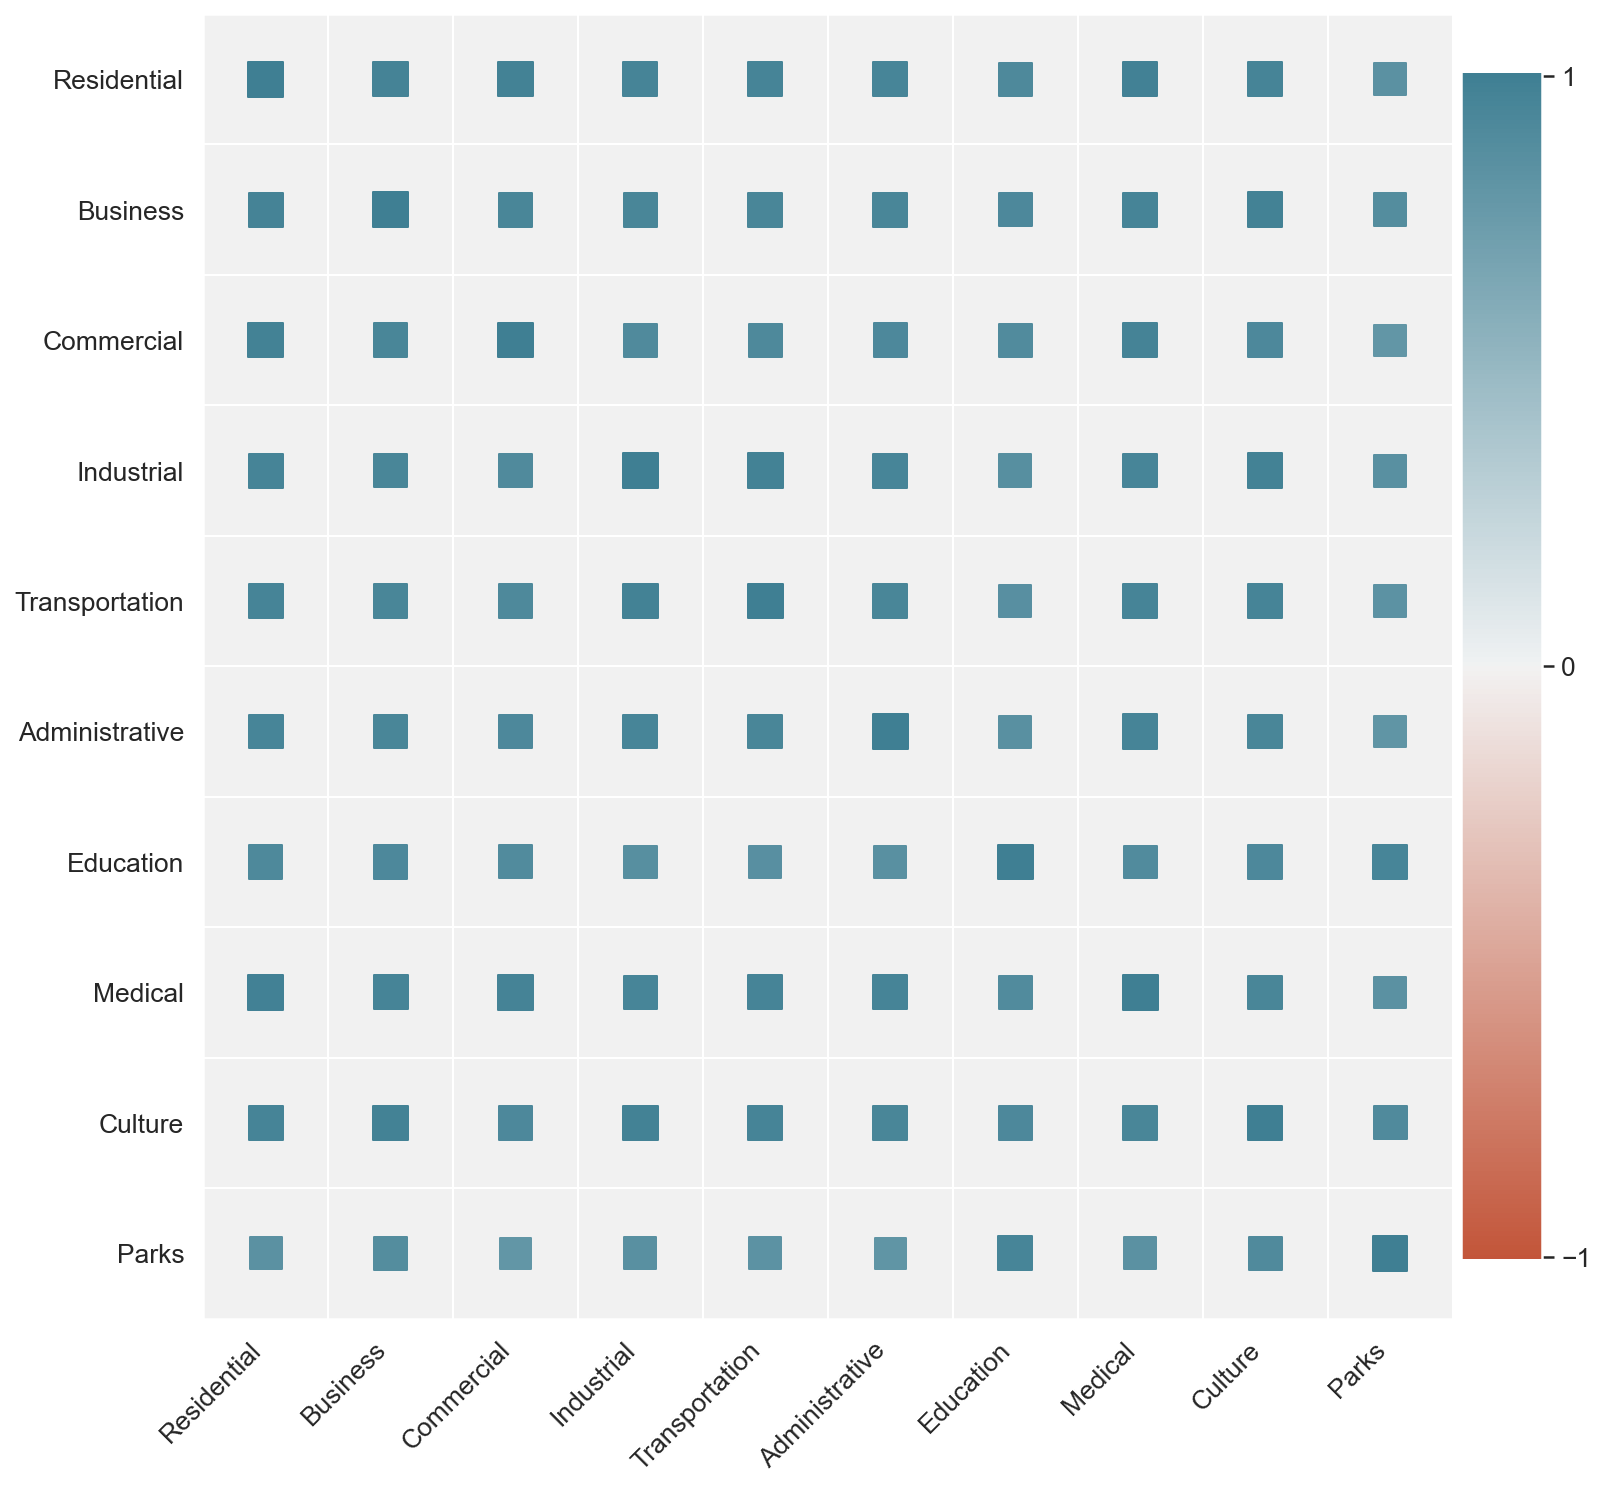

In [87]:
# !pip install heatmapz
from heatmap import heatmap, corrplot
plt.figure(figsize=(8, 8))
corrplot(data.corr(), size_scale=300);

In [1]:
import pandas as pd
tmp=pd.read_csv(r'C:\OneDriveFile\OneDrive - whu.edu.cn\旅游视角与街景视角的认知偏见\城市更新\gat0719.csv')
tmp.head()

,FID,Type,OLD,newdata
0,0,0,1,6
1,1,6,6,6
2,2,0,0,3
3,3,0,0,3
4,4,6,0,2


In [2]:
#绘制混淆矩阵
# test_acc = test()
from sklearn.metrics import confusion_matrix
conmatrix=confusion_matrix(tmp['OLD'], tmp['newdata'])
conmatrix

array([[1515,   12,  591,  636,   11,   15,  460,   12,  124,   16],
       [  66,   22,   12,   27,    5,    1,   21,    0,    1,    3],
       [  91,    5,  160,    4,    0,    0,   31,    2,    0,    0],
       [  59,    0,    3,  278,    2,    0,   49,    0,   19,    2],
       [   4,    0,    2,   12,   15,    0,    1,    0,    0,    0],
       [   6,    0,    8,   15,    4,   13,    2,    0,    0,    0],
       [ 154,    0,   18,   76,    0,    0,  486,    0,    5,    8],
       [   7,    0,   10,    2,    0,    0,    0,   18,    0,    0],
       [  36,    0,   27,  111,    0,    2,   19,    0,   52,    1],
       [  10,    1,    2,   16,    0,    0,   30,    0,    1,   29]],
      dtype=int64)

In [4]:
df = pd.DataFrame(conmatrix,# Create the index
index = ["Residential","Business",
"Commercial","Industrial",
"Transportation","Administrative",
"Education","Medical",
"Sports/Culture","Park Green Space"],columns=['Res',
'Bus','Com','Ind','Tra','Adm','Edu','Med','Spo','Par']
)
df.to_csv('myfile.csv')

<Figure size 720x576 with 0 Axes>

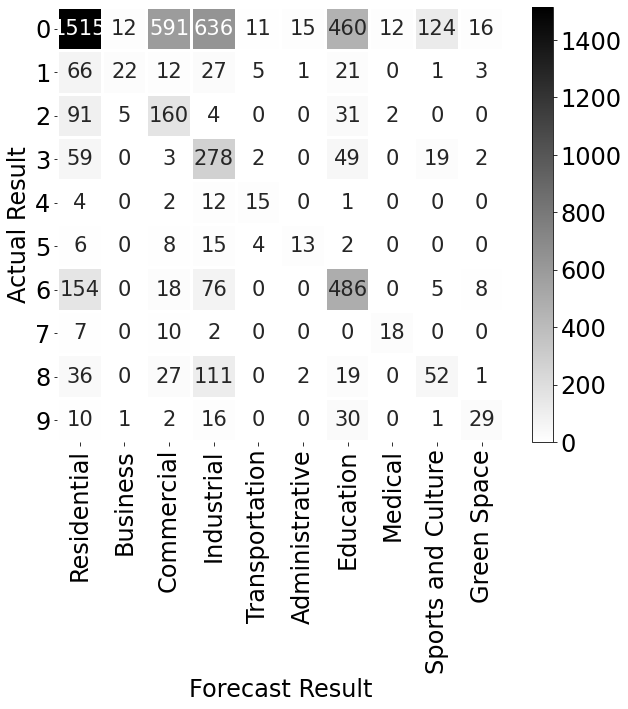

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
df_cm=pd.DataFrame(conmatrix,
columns=["Residential","Business",
"Commercial","Industrial",
"Transportation","Administrative",
"Education","Medical",
"Sports/Culture","Park Green Space"])#&Transport
plt.figure(figsize=(10,8))
f, ax= plt.subplots(figsize = (10, 8))
 
h=sns.heatmap(df_cm,annot=True,cmap="binary",fmt='.20g',ax=ax,linewidths=2,
            annot_kws={'size':21},cbar=False)
 
#h=sns.heatmap(data, annot=True,fmt='d',linewidths=0.5,cbar=False) #设置不使用其默认自带的colorbar
cb=h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=24) #设置colorbar刻度字体大小。
 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
 
ax.tick_params(labelsize=24)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
 
plt.ylabel('Actual Result',fontsize=24)
plt.xlabel('Forecast Result',fontsize=24)
plt.savefig('城市更新.svg',format='svg')
plt.show()

{0: 2746, 6: 1087, 2: 476, 8: 444, 3: 439, 9: 98, 1: 71, 7: 46, 5: 28, 4: 23} new
{0: 1948, 3: 1177, 6: 1099, 2: 833, 8: 202, 9: 59, 1: 40, 4: 37, 7: 32, 5: 31} bd
{0: 3392, 6: 747, 3: 412, 2: 293, 8: 248, 1: 158, 9: 89, 5: 48, 7: 37, 4: 34} old

<Figure size 720x576 with 0 Axes>

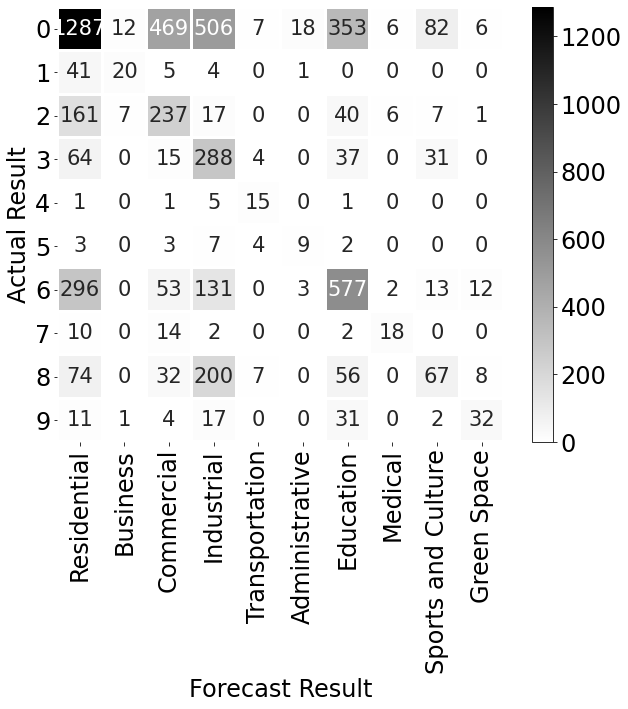

In [19]:
#绘制混淆矩阵
# test_acc = test()
from sklearn.metrics import confusion_matrix
conmatrix=confusion_matrix(tmp['Type'], tmp['newdata'])

import seaborn as sns
import matplotlib.pyplot as plt
df_cm=pd.DataFrame(conmatrix,
columns=["Residential","Business","Commercial","Industrial","Transportation","Administrative","Education","Medical","Sports and Culture","Green Space"])#&Transport
plt.figure(figsize=(10,8))
f, ax= plt.subplots(figsize = (10, 8))
 
h=sns.heatmap(df_cm,annot=True,cmap="binary",fmt='.20g',ax=ax,linewidths=2,
            annot_kws={'size':21},cbar=False)
 
#h=sns.heatmap(data, annot=True,fmt='d',linewidths=0.5,cbar=False) #设置不使用其默认自带的colorbar
cb=h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=24) #设置colorbar刻度字体大小。
 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
 
ax.tick_params(labelsize=24)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
 
plt.ylabel('Actual Result',fontsize=24)
plt.xlabel('Forecast Result',fontsize=24)
plt.savefig('城市更新.svg',format='svg')
plt.show()

In [24]:
# %time
# embeddings = model.encode(scene_list)

old_embeddings=pd.read_csv(r'C:\OneDriveFile\OneDrive - whu.edu.cn\旅游视角与街景视角的认知偏见\城市更新\changes\old.csv').values[:,1:].T
new_embeddings=pd.read_csv(r'C:\OneDriveFile\OneDrive - whu.edu.cn\旅游视角与街景视角的认知偏见\城市更新\changes\new.csv').values[:,1:].T

In [25]:
cos=[]
from scipy import spatial
for i in range(old_embeddings.shape[0]):
    cos.append(spatial.distance.cosine(old_embeddings[i],new_embeddings[i]))

In [28]:
pd.DataFrame({'predcos':cos}).to_csv('renewrate.csv')